In [58]:
##Instalar solo una vez
#install.packages("modeest")
#install.packages("psych")
#install.packages("moments")
#install.packages("corrplot")
install.packages("e1071")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [62]:
library(readr)
library(dplyr)
library(modeest)
library(e1071)
library(ggplot2)
library(corrplot)
library(psych)
#library(moments)

In [73]:
dataset <- read_delim("./dataset.csv",";", escape_double = FALSE, trim_ws = TRUE)
colnames(dataset)

Parsed with column specification:
cols(
  Comunidad = col_character(),
  Ciudad = col_character(),
  `Cantidad de perfiles facebook` = col_double(),
  `Tasa desempleo ciudad` = col_double(),
  `% Población sedentaria` = col_double(),
  `Salario medio por hora` = col_double(),
  `Parques m2/hab` = col_double(),
  `Usuarios jóvenes (18-39)` = col_double(),
  `Usuarios adultos (40-64)` = col_double(),
  `Usuarios mayores (+ 65)` = col_double(),
  Hombres = col_double(),
  Mujeres = col_double(),
  Población = col_double()
)


[1] "Comunidad"                     "Ciudad"                       
 [3] "Cantidad de perfiles facebook" "Tasa desempleo ciudad"        
 [5] "% Población sedentaria"        "Salario medio por hora"       
 [7] "Parques m2/hab"                "Usuarios jóvenes (18-39)"     
 [9] "Usuarios adultos (40-64)"      "Usuarios mayores (+ 65)"      
[11] "Hombres"                       "Mujeres"                      
[13] "Población"

In [74]:
#Reducir el número de columnas a las que se van a utilizar
dataRed<- dataset %>% 
          select('Ciudad','Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')
dataCuant<- dataset %>% 
          select('Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')
#str(dataCuant)
dataRed<- rename(dataRed, TasaDC = 'Tasa desempleo ciudad')
dataRed<- rename(dataRed, PobSeden = '% Población sedentaria')

colnames(dataRed)

[1] "Ciudad"                        "Cantidad de perfiles facebook"
[3] "TasaDC"                        "PobSeden"                     
[5] "Hombres"                       "Mujeres"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


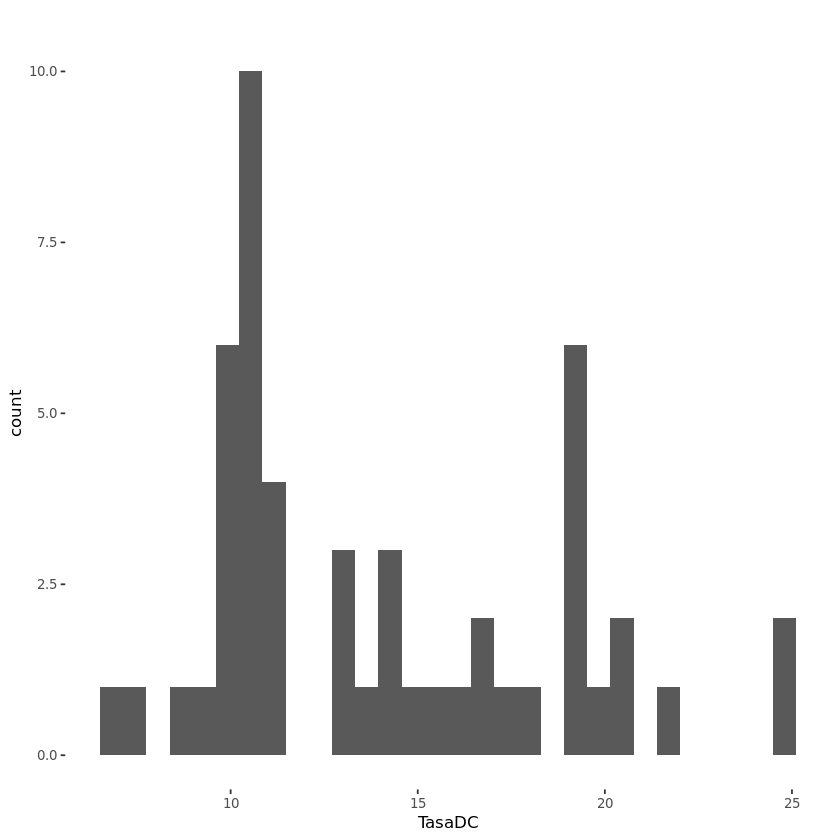

In [75]:
#Gráficos
ggplot(data = dataRed, mapping = aes(x = TasaDC)) +
  geom_histogram() +
  labs(title = "")+
  theme(panel.background = element_rect(fill = 'white'), 
        text=element_text(size=10,  family="Arial"),
        legend.position  = "bottom")

[1] 14.0182
[1] 20.63262
[1] 12.955
[1] 10.5
[1] 6.91
[1] 24.89
[1] 7.5075
[1] 12.7183
[1] 13.34
[1] 14.72175
[1] -0.7220774
     0%     25%     50%     75%    100% 
 6.9100 10.5000 12.9550 18.0075 24.8900 


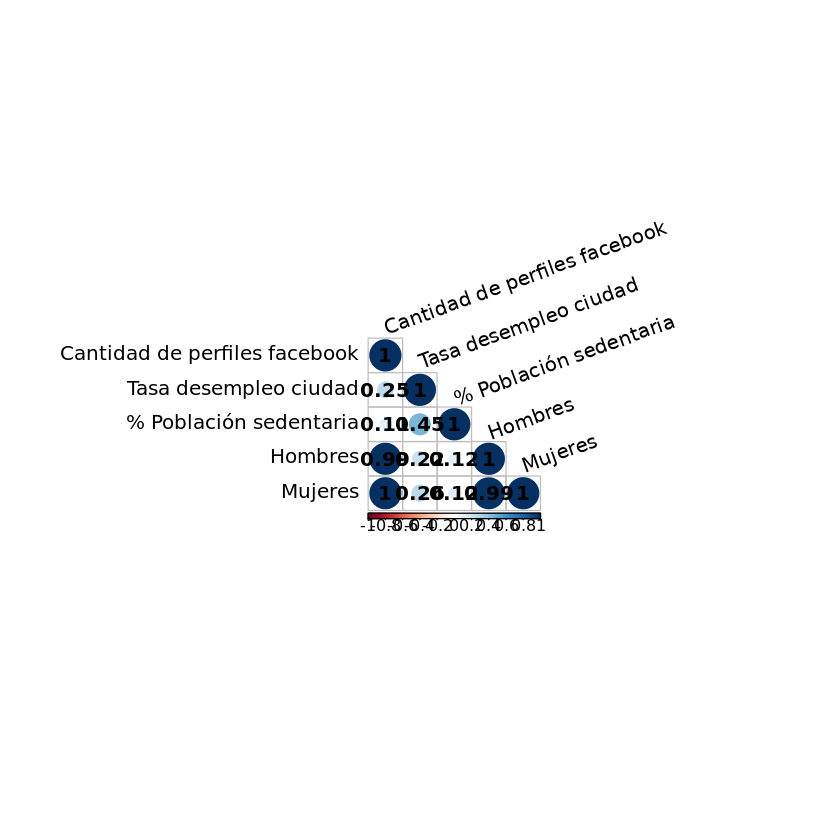

In [76]:
desMean <- mean(dataRed$'TasaDC')
print(desMean)
desVar <- var(dataRed$'TasaDC')
print(desVar)
desMed <- median(dataRed$'TasaDC')
print(desMed)
desMod <- mfv(dataRed$'TasaDC')
print(desMod)
desMin <- min(dataRed$'TasaDC')
print(desMin)
desMax <- max(dataRed$'TasaDC')
print(desMax)
desRango <- IQR(dataRed$'TasaDC')
print(desRango)
#duda Media Armonica
desArm <- 1/mean(1/dataRed$'TasaDC')
print(desArm)
#media geométrica
n <- length(dataRed$'TasaDC')
desMGeo <- prod(dataRed$'TasaDC')^(1/n)
print(desMGeo)
#media cuadrática
desMCua <- (sum(dataRed$'TasaDC' ** 2) / n) ** 0.5
print(desMCua)

desKur <- kurtosis(dataRed$'TasaDC')
print(desKur)

desQuant <- quantile(dataRed$'TasaDC', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(desQuant)

correlacion<-cor(dataCuant)
corrplot(correlacion,method="circle", shade.col=NA, tl.col="black",
        tl.srt=20, addCoef.col="black",type="lower")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


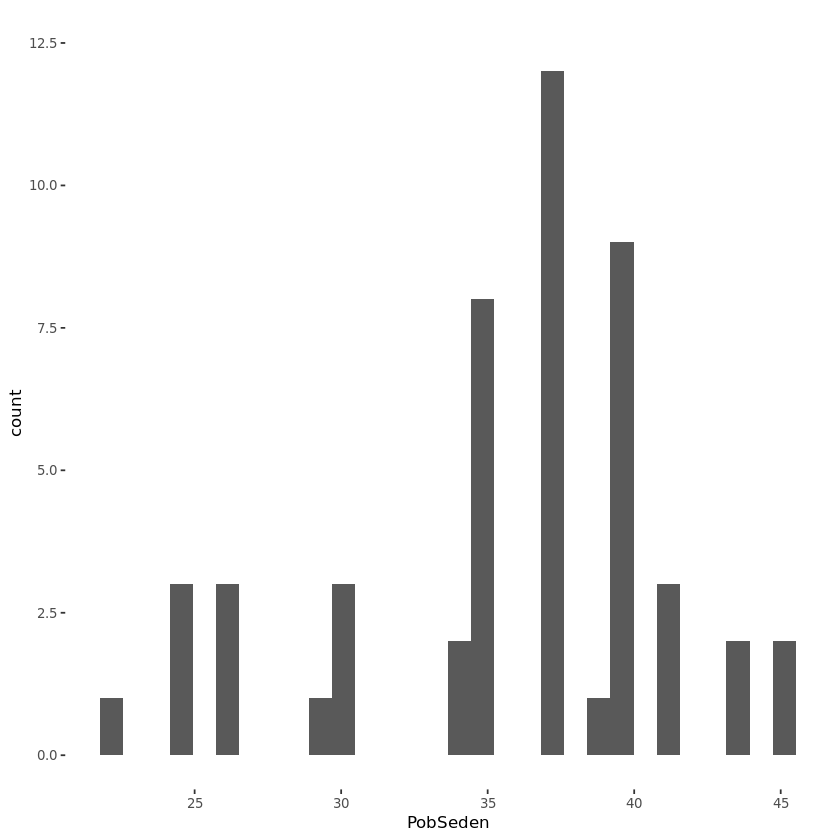

In [77]:
ggplot(data = dataRed, mapping = aes(x = PobSeden)) +
  geom_histogram() +
  labs(title = "")+
  theme(panel.background = element_rect(fill = 'white'), 
        text=element_text(size=10,  family="Arial"),
        legend.position  = "bottom")

In [78]:
pobMean <- mean(dataRed$'PobSeden')
print(pobMean)
pobVar <- var(dataRed$'PobSeden')
print(pobVar)
pobMed <- median(dataRed$'PobSeden')
print(pobMed)
pobMod <- mfv(dataRed$'PobSeden')
print(pobMod)
pobMin <- min(dataRed$'PobSeden')
print(pobMin)
pobMax <- max(dataRed$'PobSeden')
print(pobMax)
pobRango <- IQR(dataRed$'PobSeden')
print(pobRango)
#duda Media Armonica
pobArm <- 1/mean(1/dataRed$'PobSeden')
print(pobArm)
#media geométrica
n <- length(dataRed$'PobSeden')
pobMGeo <- prod(dataRed$'PobSeden')^(1/n)
print(pobMGeo)
#media cuadrática
pobMCua <- (sum(dataRed$'PobSeden' ** 2) / n) ** 0.5
print(pobMCua)

pobKur <- kurtosis(dataRed$'PobSeden')
print(pobKur)

pobQuant <- quantile(dataRed$'PobSeden', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(pobQuant)

[1] 35.6366
[1] 31.28248
[1] 37.315
[1] 37.35
[1] 22.03
[1] 44.99
[1] 5.32
[1] 34.62885
[1] 35.15891
[1] 36.06417
[1] -0.2009859
     0%     25%     50%     75%    100% 
22.0300 34.0525 37.3150 39.3725 44.9900 
